In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip3 install xlrd

In [3]:
# input_data = pd.read_csv("drugsComTrain_raw.tsv", sep = '\t')
input_data_EDA = pd.read_excel("EDA_ML.xlsx")
# input_data_EDA

In [4]:
# !pip3 install nltk

In [51]:
import nltk
from nltk.tokenize import word_tokenize

male_comterms = ['son', 'husband', 'father', 'dad', 'male' ] #words in comments indicating male
male_diseaseterms = ['prostate', 'erectile', 'penis', 'penile', 'testicular', 'testicle']
female_comterms = ['daughter', 'wife', 'mother', 'mom', 'female']
female_diseaseterms = ['abortion', 'breas', 'birth', 'prenatal', 'postnatal', 'contraception', 'contraceptive', 'vagina', 'ovary', 'ovarian', 'pcos']
conditions_chosen_male = ['testi', 'prostate', 'erecti']
conditions_chosen_female = ['pelvic', 'menstrual', 'vulvodynia', 'vaginal']

In [6]:
# input_data_EDA.dropna(axis="columns", how="all")
# input_data_EDA.dropna(axis="columns", thresh=len(input_data_EDA)-1000, inplace=True)

In [7]:
# input_data_EDA.drop(['sex'],axis=1,inplace=True)

In [52]:
input_data_EDA.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
sex            0
dtype: int64

In [53]:
input_data_EDA.dropna(axis="columns", thresh=len(input_data_EDA)-1000, inplace=True)

In [54]:
input_data_EDA.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
sex            0
dtype: int64

In [55]:
input_data_EDA.dropna(inplace=True)

In [56]:
def label_sex(tokenized_words):
        if any(elem in tokenized_words for elem in male_comterms):
            return "Male"
        if any(elem in tokenized_words for elem in male_diseaseterms):
            return "Male"
        if any(elem in tokenized_words for elem in conditions_chosen_male):
            return "Male"
        if any(elem in tokenized_words for elem in female_comterms):
            return "Female"
        if any(elem in tokenized_words for elem in female_diseaseterms):
            return "Female"
        if any(elem in tokenized_words for elem in conditions_chosen_female):
            return "Female"
        else:
            return "Neutral"

In [63]:
input_data_EDA[:10]

,drugName,condition,review,rating,date,usefulCount,sex
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,"May 20, 2012",27,Neutral
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192,Neutral
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,Female
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,Female
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,"November 27, 2016",37,Neutral
155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,"November 28, 2015",43,Neutral
165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,"March 7, 2017",5,Female
102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,"March 14, 2015",32,Neutral
74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,"August 9, 2016",11,Neutral
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,Female


In [64]:
# input_data["sex"] = np.where(label_sex(), 'Male', 'Female')  
#     input_data.apply(lambda row: label_sex(row),axis=1)
#     input_data["sex"] = np.where((elem in words for elem in male_comterms),"FeMale","male")
#     if any(elem in words for elem in male_comterms):
#     words in male_comterms:
#         print('work')
#     input_data["sex"] = 
# for comment in input_data.review[:3]:
#     tokenized_words = word_tokenize(comment)
# input_data["sex"] = np.where((elem in word_tokenize(comment) for comment in input_data.review[:3] for elem in male_comterms),"Male","Female")
# test_set = input_data_EDA[:10]
result = []
result_cond = []
for comment in input_data_EDA.review:
    words = word_tokenize(comment.lower())
    result.append(label_sex(words))

for cond in input_data_EDA.condition:
    cond_words = word_tokenize(cond.lower())
    result_cond.append(label_sex(cond_words))

# final_result = [int(i==j) for i, j in zip(result, result_cond)]
# final_result = [i for i in result if i not in result_cond]
# result, result_cond
# final_result

final_result = [i if i==j else j for i,j in zip(result, result_cond)]
# final_result
input_data_EDA.loc[(input_data_EDA.review.index),'sex'] = final_result
input_data_EDA
# test_set
# for elm in final_result:
#     if(elm):
#         test_set.loc[(test_set.review.index),'sex'] = result[elm]
#     else:
#         test_set.loc[(test_set.condition.index),'sex'] = result_cond[elm]
        
# test_set

,drugName,condition,review,rating,date,usefulCount,sex
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,"May 20, 2012",27,Neutral
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192,Neutral
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,Female
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,Female
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,"November 27, 2016",37,Neutral
155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,"November 28, 2015",43,Neutral
165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,"March 7, 2017",5,Female
102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,"March 14, 2015",32,Neutral
74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,"August 9, 2016",11,Neutral
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,Female


In [65]:
input_data_EDA.sex.value_counts()

Neutral    124299
Female      34457
Male         1715
Name: sex, dtype: int64

In [20]:
# input_data_EDA.condition.isnull().sum()
# input_data_EDA
# input_data_EDA = pd.concat([input_data_EDA,df_result], axis=1)
# df_result.shape
# input_data_EDA.isnull().sum()
# input_data_EDA[:10]

In [66]:
# input_data_EDA.isnull().sum()
# input_data_EDA.shape
input_data_EDA.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
sex            0
dtype: int64

In [67]:
chosen_drugs = input_data_EDA[input_data_EDA.drugName.isin(['Levonorgestrel', 'Etonogestrel', 'Phentermine', 'Sertraline', 'Gabapentin', 'Miconazole', 'Bupropion', 'Metronidazole', 'Clonazepam', 'Quetiapine'])]
# for x in np.nditer(result):
#     print(result)
# (x for x in np.nditer(result)
# df_result

In [68]:
#Deleting the drug-id
# chosen_drugs = chosen_drugs.drop(['Unnamed: 0'],axis=1)
totalNo_NaNs_Condition = chosen_drugs.isnull().sum()#In total 29 NaNs are present for just the 'condition'
indexOfNaNs_Condition = list(chosen_drugs.isnull().index)
Total_NaNs = len(indexOfNaNs_Condition)#5653 total NaNs

In [69]:
# chosen_drugs = chosen_drugs.drop(['Unnamed: 7'],axis=1)
# lemma.lemmatize("Bacterial Vaginitis")
# conditions
# chosen_drugs
# chosen_drugs.dropna(axis="columns")
chosen_drugs.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
sex            0
dtype: int64

In [70]:
# chosen_drugs.dropna(axis="columns",how="all").shape[0]
chosen_nonull_drugs = chosen_drugs.dropna()

In [71]:
# chosen_drugs.shape
chosen_nonull_drugs.drugName.value_counts() #final selected drug dataset with no NaNs.

Levonorgestrel    3657
Etonogestrel      3335
Phentermine       1542
Sertraline        1357
Gabapentin        1045
Bupropion         1021
Miconazole         999
Metronidazole      921
Quetiapine         830
Clonazepam         830
Name: drugName, dtype: int64

In [72]:
#Saving the data formatted so as to avoid rerunning the formatting step again and again
import pickle

In [73]:
save_formatted_Data = open("formatted_drug_Data.pickle","wb")#wb = write in bytes for Python 3 and above
pickle.dump(chosen_nonull_drugs,save_formatted_Data)
save_formatted_Data.close()

In [74]:
#Plotting for a parituclar drugName the performance over time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation

/home/sagar/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
# 
# chosen_nonull_drugs_noreview.head()
chosen_nonull_drugs_noreview = chosen_nonull_drugs.drop(["review"],1)
chosen_nonull_drugs_noreview.head()

,drugName,condition,rating,date,usefulCount,sex
165907,Levonorgestrel,Emergency Contraception,1,"March 7, 2017",5,Female
227020,Etonogestrel,Birth Control,9,"August 11, 2014",11,Female
96233,Sertraline,Depression,8,"May 7, 2011",3,Neutral
173398,Clonazepam,Panic Disorde,9,"April 1, 2008",30,Neutral
225508,Bupropion,Smoking Cessation,10,"August 22, 2014",15,Neutral


In [38]:
chosen_nonull_drugs_noreview.dtypes

drugName       object
condition      object
rating          int64
date           object
usefulCount     int64
sex            object
dtype: object

In [76]:
chosen_nonull_drugs_noreview['date'] = pd.to_datetime(chosen_nonull_drugs_noreview.date)

In [41]:
chosen_nonull_drugs_noreview.dtypes

drugName               object
condition              object
rating                  int64
date           datetime64[ns]
usefulCount             int64
sex                    object
dtype: object

In [77]:
chosen_nonull_drugs_noreview.head()

,drugName,condition,rating,date,usefulCount,sex
165907,Levonorgestrel,Emergency Contraception,1,2017-03-07,5,Female
227020,Etonogestrel,Birth Control,9,2014-08-11,11,Female
96233,Sertraline,Depression,8,2011-05-07,3,Neutral
173398,Clonazepam,Panic Disorde,9,2008-04-01,30,Neutral
225508,Bupropion,Smoking Cessation,10,2014-08-22,15,Neutral


In [78]:
chosen_nonull_drugs_noreview.date.max()

Timestamp('2017-12-11 00:00:00')

In [79]:
chosen_nonull_drugs_noreview.date.min()

Timestamp('2008-02-25 00:00:00')

In [80]:
chosen_nonull_drugs_noreview.date.max() - chosen_nonull_drugs_noreview.date.min()

Timedelta('3577 days 00:00:00')

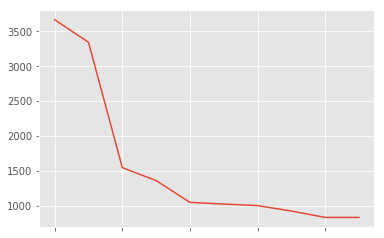

In [81]:
%matplotlib inline
chosen_nonull_drugs_noreview.drugName.value_counts().plot()

# Maximum reviews which year for any drug

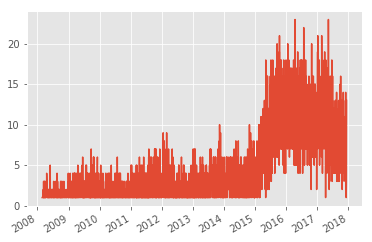

In [82]:
chosen_nonull_drugs_noreview.date.value_counts().sort_index().plot()

In [89]:
chosen_Clonazepam_drug = chosen_nonull_drugs_noreview.loc[chosen_nonull_drugs_noreview['drugName'] == 'Clonazepam']
# chosen_Clonazepam_drug

In [90]:
# chosen_nonull_drugs_noreview.loc[chosen_nonull_drugs_noreview['drugName'] == 'Quetiapine']
# chosen_nonull_drugs_noreview.condition.value_counts()
chosen_nonull_drugs_noreview.head()

,drugName,condition,rating,date,usefulCount,sex
165907,Levonorgestrel,Emergency Contraception,1,2017-03-07,5,Female
227020,Etonogestrel,Birth Control,9,2014-08-11,11,Female
96233,Sertraline,Depression,8,2011-05-07,3,Neutral
173398,Clonazepam,Panic Disorde,9,2008-04-01,30,Neutral
225508,Bupropion,Smoking Cessation,10,2014-08-22,15,Neutral


# The drugs present are: 'Gabapentin', 'Miconazole', 'Bupropion', 'Metronidazole', 'Clonazepam', 'Quetiapine', 'Levonorgestrel','Etonogestrel', 'Phentermine', 'Sertraline'      

In [92]:
# chosen_Clonazepam_drug.date.value_counts().sort_index()

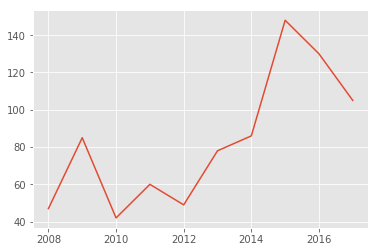

In [93]:
# chosen_Clonazepam_drug['Year'] = chosen_Clonazepam_drug.date.dt.year
# chosen_Clonazepam_drug.head()
# chosen_Clonazepam_drug.loc[(chosen_Clonazepam_drug.rating.index),'Year'] = chosen_Clonazepam_drug.date.dt.year

chosen_Clonazepam_drug.date.dt.year.value_counts().sort_index().plot()

In [94]:
chosen_Clonazepam_drug.groupby(chosen_Clonazepam_drug.date.dt.year).rating.mean()

date
2008    8.851064
2009    8.647059
2010    9.428571
2011    8.600000
2012    8.877551
2013    9.012821
2014    9.197674
2015    8.743243
2016    7.700000
2017    7.980952
Name: rating, dtype: float64

# Avg rating of drug Clonazepam over the time

Text(0.5,1,'Clonazepam Performance')

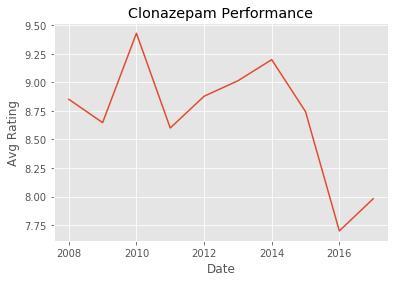

In [95]:
chosen_Clonazepam_drug.groupby(chosen_Clonazepam_drug.date.dt.year).rating.mean().plot()
plt.xlabel('Date')
plt.ylabel('Avg Rating')
plt.title('Clonazepam Performance')

In [90]:
# plt.plot(chosen_Clonazepam_drug.date.dt.year.value_counts(),chosen_Clonazepam_drug.rating,label='Drug Performance')
# plt.xlabel('Date')
# plt.ylabel('Rating')
# plt.title('Clonazepam Performance')

# plt.legend()
# plt.show()


In [ ]:
# TODO STEPS:
# 1.CONVERT DATE TO INT FOR PLOT - (DONE)
# 2.CONVERT OTHER COLUMNS TO INT THEN PLOT for a "particular drug" how the "rating" has been over "time(date)" - (DONE)
# 3.divide the dataset into test and training set crossvalidation
# 4.run kmeans, super learner

In [96]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))
    return df

In [98]:
chosendrugs_nonull_numeric = handle_non_numerical_data(chosen_nonull_drugs)
# print(chosen_nonull_drugs.head())
# handle_non_numerical_data(chosen_nonull_drugs)
# chosen_nonull_drugs

# Reported disease occurences over time

Text(0.5,1,'Reported disease occurences over time')

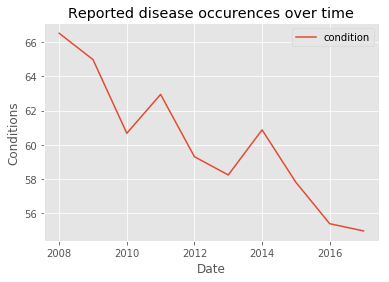

In [99]:
# plt.plot(chosen_nonull_drugs_noreview.date.dt.year.value_counts(),chosendrugs_nonull_numeric.condition,label='Drug Performance')
# plt.xlabel('Date')
# plt.ylabel('Condition')
# plt.title('Reported disease occurences over time')

# plt.legend()
# plt.show()
chosendrugs_nonull_numeric.groupby(chosen_nonull_drugs_noreview.date.dt.year).condition.mean().plot()
plt.xlabel('Date')
plt.ylabel('Conditions')
plt.legend()
plt.title('Reported disease occurences over time')

In [100]:
#INPUT FEATURES - Condition, Rating, Usefulcount, Sex
#OUTPUT FEATURES - DrugName
from sklearn.model_selection import train_test_split

In [101]:
chosendrugs_nonull_numeric.head()

,drugName,condition,review,rating,date,usefulCount,sex
165907,3,35,10,1,803,5,1
227020,2,66,1153,9,1629,11,1
96233,4,32,11582,8,2951,3,0
173398,7,16,8330,9,3032,30,0
225508,0,9,7816,10,2461,15,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    chosendrugs_nonull_numeric[["condition","rating","usefulCount","sex"]], chosendrugs_nonull_numeric["drugName"], test_size=.4, stratify=chosendrugs_nonull_numeric["drugName"], random_state=0)

In [103]:
#Since the features are independent of each other we try for NB model for classification
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print(gnb.score(X_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"
       % (y_test.shape[0],(y_test != y_pred).sum()))

Test set predictions:
 [2 2 0 ... 1 0 2]
0.47755430410297667
Number of mislabeled points out of a total 6215 points : 3247


In [104]:
#KNN
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print(knn.score(X_test, y_test))

Test set predictions:
 [2 2 0 ... 7 0 2]
0.6556717618664522


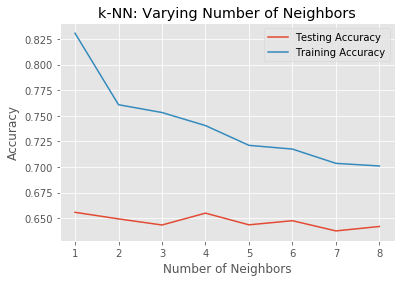

In [105]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [21]:
# df=pd.read_csv(r'C:\Users\Guest1\Desktop\ML Project\drugsComTrain_raw.tsv', sep = '\t', engine='python')
# df.head(10)
# #df = df.drop(df.columns[[0]], axis=1)
# #df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# df.head()

# #1 star reviews
# rating_1 = df['rating']==1.0
# #print(rating_1.head()) #shows boolean value for if rating is 1
# df_r1 = df[rating_1]
# #print(df_r1.shape) #21619 rows
# #print(df_r1.head())

# rating_2 = df['rating']==2.0
# df_r2 = df[rating_2]

# rating_3 = df['rating']==3.0
# df_r3 = df[rating_3]

# rating_4 = df['rating']==4.0
# df_r4 = df[rating_4]

# rating_5 = df['rating']==5.0
# df_r5 = df[rating_5]

# rating_6 = df['rating']==6.0
# df_r6 = df[rating_6]

# rating_7 = df['rating']==7.0
# df_r7 = df[rating_7]

# rating_8= df['rating']==8.0
# df_r8 = df[rating_8]

# rating_9 = df['rating']==9.0
# df_r9 = df[rating_9]

# rating_10 = df['rating']==10.0
# df_r10 = df[rating_10]

# rate_list = [(len(df_r1)), (len(df_r2)), (len(df_r3)), (len(df_r4)), (len(df_r5)), (len(df_r6)), (len(df_r7)), (len(df_r8)), (len(df_r9)),(len(df_r10))]

# print(df.shape)
# print(df.head())
# ids = df.iloc[:, 0]
# uniqueids = ids.unique()
# len(uniqueids)

# rating_dict = {1: (len(df_r1)), 2: len(df_r2), 3: len(df_r3), 4: len(df_r4), 5: len(df_r5), 6: len(df_r6), 7: len(df_r7), 8: len(df_r8), 9: len(df_r9), 10: len(df_r10)}
# ratingdf = pd.DataFrame(rating_dict, index=[0])
# df.isnull().sum().sum()

In [ ]:
# date = df.iloc[:, 5]
# df[date] = pd.to_datetime(df[date])

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# pca.fit(df)

In [ ]:
# conditions = df.iloc[:, 2]
# uniquecond = conditions.unique()
# len(uniquecond) #884 dif conditions

# grouped = df.groupby(['condition'])
# grouped.describe()
# #list(df.condition.value_counts())

In [ ]:
# drugs = df.iloc[:, 1]
# uniquedrug = drugs.unique()
# len(uniquedrug) #3431 dif drugs

# grouped_drug = df.groupby(['drugName'])
# grouped_drug.describe()
# druglist = list(df.drugName.value_counts())
# grouped_drug.describe()
# #max(druglist)

In [ ]:
# male_comterms = ['son', 'husband', 'father', 'he', 'him', 'his', 'dad', 'male' ] #words in comments indicating male
# male_diseaseterms = ['prostate', 'erectile', 'penis', 'penile', 'testicular', 'testicle']
# female_comterms = ['daughter', 'wife', 'mother', 'mom', 'her', 'she', 'female']
# female_diseaseterms = ['abortion', 'breast', 'birth', 'prenatal', 'postnatal', 'contraception', 'vaginal', 'vagina', 'ovary', 'ovarian', 'PCOS']


# #list(df)

# df.dtypes
# df["review"] = pd.Series.to_string(df["review"])


# # # df["sex"] = np.where(df["review"].isin(male_comterms),"Male","Female")
# # # df["review"].str.match(lambda x: male_comterms[x])
# # # (male_comterms)
# # # print(males.shape)
# df.head(100)

In [ ]:
# df.dtypes